In [4]:
import cv2
import numpy as np
from  matplotlib import pyplot as plt

# 1.加载图片，转为二值图
img = cv2.imread('shapes.jpg')
drawing = np.zeros(img.shape[:], dtype=np.uint8)
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
edges = cv2.Canny(gray, 50, 150)

# 2.霍夫直线变换
lines = cv2.HoughLines(edges, 0.8, np.pi / 180, 90)



函数中：

- 参数1：要检测的二值图（一般是阈值分割或边缘检测后的图）
- 参数2：距离r的精度，值越大，考虑越多的线
- 参数3：角度θ的精度，值越小，考虑越多的线
- 参数4：累加数阈值，值越小，考虑越多的线

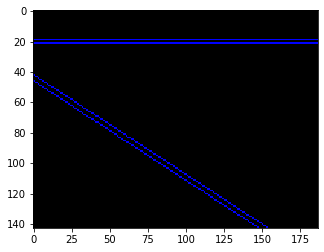

In [6]:
# 3.将检测的线画出来（注意是极坐标噢）
for line in lines:
    rho, theta = line[0]
    a = np.cos(theta)
    b = np.sin(theta)
    x0 = a * rho
    y0 = b * rho
    x1 = int(x0 + 1000 * (-b))
    y1 = int(y0 + 1000 * (a))
    x2 = int(x0 - 1000 * (-b))
    y2 = int(y0 - 1000 * (a))

    cv2.line(drawing, (x1, y1), (x2, y2), (0, 0, 255))
plt.imshow(drawing)

# 统计概率霍夫直线变换

In [7]:
drawing = np.zeros(img.shape[:], dtype=np.uint8)
# 3.统计概率霍夫线变换
lines = cv2.HoughLinesP(edges, 0.8, np.pi / 180, 90,
                        minLineLength=50, maxLineGap=10)


前面几个参数跟之前的一样，有两个可选参数：

- minLineLength：最短长度阈值，比这个长度短的线会被排除
- maxLineGap：同一直线两点之间的最大距离

In [8]:
# 3.将检测的线画出来
for line in lines:
    x1, y1, x2, y2 = line[0]
    cv2.line(drawing, (x1, y1), (x2, y2), (0, 255, 0), 1, lineType=cv2.LINE_AA)


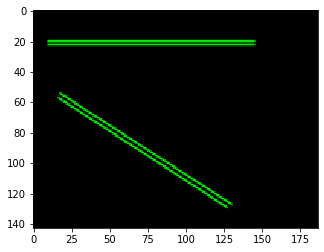

In [9]:
plt.imshow(drawing)

# 霍夫圆变换


霍夫圆变换跟直线变换类似，只不过线是用(r,θ)表示，圆是用(x_center,y_center,r)来表示，从二维变成了三维，数据量变大了很多；所以一般使用霍夫梯度法减少计算量，对该算法感兴趣的同学可参考：

In [10]:
drawing = np.zeros(img.shape[:], dtype=np.uint8)
# 2.霍夫圆变换
circles = cv2.HoughCircles(edges, cv2.HOUGH_GRADIENT, 1, 20, param2=30)
circles = np.int0(np.around(circles))

- 参数2：变换方法，一般使用霍夫梯度法，详情：HoughModes
- 参数3 dp=1：表示霍夫梯度法中累加器图像的分辨率与原图一致
- 参数4：两个不同圆圆心的最短距离
- 参数5：param2跟霍夫直线变换中的累加数阈值一样

In [12]:
# 将检测的圆画出来
for i in circles[0, :]:
    cv2.circle(drawing, (i[0], i[1]), i[2], (0, 255, 0), 2)  # 画出外圆
    cv2.circle(drawing, (i[0], i[1]), 2, (0, 0, 255), 3)  # 画出圆心

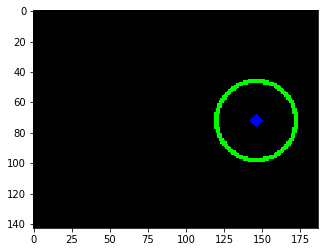

In [13]:
plt.imshow(drawing)

引用

> [Python+OpenCV教程17：霍夫变换](http://codec.wang/opencv-python-hough-transform/#%E5%BC%95%E7%94%A8)